In [1]:
cd ..

/home/wesg/research/ordinal-probing


In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import torch
from scipy.stats import rankdata
from load import load_model
import datasets
import seaborn as sns

from feature_datasets.common import *
import utils
import os
import pickle
from probe_experiment import load_probe_results
from analysis.generalization import*
from analysis.probe_plots import *

%matplotlib inline

In [6]:
experiment_name = 'prompt_full'
models = ['Llama-2-7b-hf', 'Llama-2-13b-hf', 'Llama-2-70b-hf']
trial_info = {
    'World': ('world_place', 'coords', 'coords'),
    'USA': ('us_place', 'coords', 'coords'),
    'NYC': ('nyc_place', 'coords', 'where_nyc'),
    'Historical': ('historical_figure', 'death_year', 'when'),
    'Entertainment': ('art', 'release_date', 'release'),
    'Headlines': ('headline', 'pub_date', 'when_w_period'),
}

In [7]:
def load_nonlinear_experiment(experiment_name, model, entity_type, feature_name, prompt_name):
    save_path = os.path.join(
        os.getenv('RESULTS_DIR', 'results'),
        experiment_name,
        model,
        entity_type,
        feature_name,
        'nonlinearity_test'
    )
    result_name = f'{prompt_name}.p'
    result = pickle.load(
        open(os.path.join(save_path, result_name), 'rb')
    )
    return result


In [8]:
results = {}
for model in models:
    for title, (entity_type, feature_name, prompt_name) in trial_info.items():
        results[model, title] = load_nonlinear_experiment(experiment_name, model, entity_type, feature_name, prompt_name)
        

In [9]:
ridge_val_results = {}
mlp_val_results = {}
ridge_scores = {}
mlp_scores = {}
ridge_preds = {}
mlp_preds = {}
for (model, title), model_result_dict in results.items():
    for layer, layer_result_dict in model_result_dict.items():
        ridge_val_results[model, title, layer] = layer_result_dict['ridge_cv_values']
        mlp_val_results[model, title, layer] = layer_result_dict['mlp_validation_scores']

        ridge_scores[model, title, layer] = layer_result_dict['ridge_scores']
        mlp_scores[model, title, layer] = layer_result_dict['mlp_scores']

        ridge_preds[model, title, layer] = layer_result_dict['ridge_prediction_df']
        mlp_preds[model, title, layer] = layer_result_dict['mlp_prediction_df']

In [10]:
layer_result_dict.keys()

dict_keys(['ridge_scores', 'mlp_scores', 'ridge_prediction_df', 'mlp_prediction_df', 'ridge_cv_values', 'mlp_validation_scores'])

In [11]:
alpha_df = pd.DataFrame(ridge_val_results).T
alpha_df

0         1         2         3   \
Llama-2-7b-hf  World         20  0.107795  0.107614  0.107779  0.108318   
               USA           20  0.204538  0.204340  0.204967  0.206391   
               NYC           20  0.736692  0.739099  0.743507  0.749733   
               Historical    20  0.214828  0.214186  0.214212  0.214943   
               Entertainment 20  0.205616  0.204115  0.203230  0.203036   
               Headlines     20  0.423841  0.429963  0.437502  0.446543   
Llama-2-13b-hf World         24  0.100401  0.099358  0.098561  0.098065   
               USA           24  0.194547  0.191149  0.188721  0.187230   
               NYC           24  0.739280  0.734054  0.731903  0.732479   
               Historical    24  0.202621  0.199766  0.197446  0.195736   
               Entertainment 24  0.195506  0.192178  0.189205  0.186749   
               Headlines     24  0.353123  0.351913  0.351446  0.351670   
Llama-2-70b-hf World         48  0.096851  0.095038  0.093108  0.091153   
               USA           48  0.180989  0.173142  0.166028  0.159784   
               NYC           48  0.712916  0.683506  0.660275  0.642666   
               Historical    48  0.189975  0.185507  0.181078  0.176881   
               Entertainment 48  0.134949  0.131375  0.127735  0.124200   
               Headlines     48  0.282265  0.275456  0.269920  0.265611   

                                       4         5         6         7   \
Llama-2-7b-hf  World         20  0.109258  0.110625  0.112453  0.114792   
               USA           20  0.208608  0.211647  0.215589  0.220571   
               NYC           20  0.757616  0.767011  0.777784  0.789796   
               Historical    20  0.216413  0.218663  0.221742  0.225715   
               Entertainment 20  0.203592  0.204956  0.207195  0.210400   
               Headlines     20  0.457184  0.469524  0.483661  0.499688   
Llama-2-13b-hf World         24  0.097913  0.098136  0.098759  0.099809   
               USA           24  0.186635  0.186891  0.187966  0.189852   
               NYC           24  0.735439  0.740457  0.747223  0.755454   
               Historical    24  0.194684  0.194314  0.194636  0.195652   
               Entertainment 24  0.184944  0.183884  0.183637  0.184250   
               Headlines     24  0.352533  0.353990  0.355997  0.358521   
Llama-2-70b-hf World         48  0.089282  0.087604  0.086216  0.085199   
               USA           48  0.154487  0.150158  0.146784  0.144327   
               NYC           48  0.630096  0.621991  0.617810  0.617051   
               Historical    48  0.173092  0.169849  0.167250  0.165357   
               Entertainment 48  0.120939  0.118094  0.115770  0.114038   
               Headlines     48  0.262440  0.260298  0.259072  0.258649   

                                       8         9         10        11  
Llama-2-7b-hf  World         20  0.117718  0.121355  0.125896  0.131638  
               USA           20  0.226812  0.234628  0.244473  0.256969  
               NYC           20  0.802889  0.816869  0.831507  0.846533  
               Historical    20  0.230671  0.236720  0.243997  0.252660  
               Entertainment 20  0.214695  0.220252  0.227286  0.236063  
               Headlines     20  0.517692  0.537775  0.560076  0.584788  
Llama-2-13b-hf World         24  0.101325  0.103366  0.106025  0.109444  
               USA           24  0.192576  0.196227  0.200982  0.207144  
               NYC           24  0.764902  0.775366  0.786694  0.798789  
               Historical    24  0.197368  0.199799  0.202985  0.206993  
               Entertainment 24  0.185763  0.188229  0.191725  0.196369  
               Headlines     24  0.361535  0.365026  0.369005  0.373511  
Llama-2-70b-hf World         48  0.084615  0.084510  0.084921  0.085884  
               USA           48  0.142735  0.141953  0.141933  0.142641  
               NYC           48  0.619253  0.623993  0.630897  0.639643  
   

In [12]:
wd_df = pd.DataFrame(mlp_val_results).T
wd_df

0         1         2         3
Llama-2-7b-hf  World         20  0.100763  0.102135  0.102001  0.102494
               USA           20  0.191546  0.190311  0.193126  0.192372
               NYC           20  0.712163  0.723563  0.717793  0.730069
               Historical    20  0.215296  0.208255  0.214571  0.211793
               Entertainment 20  0.201822  0.197214  0.200499  0.202836
               Headlines     20  0.464620  0.544881  0.488175  0.501305
Llama-2-13b-hf World         24  0.087451  0.090849  0.090014  0.089053
               USA           24  0.171452  0.169638  0.169363  0.172142
               NYC           24  0.743297  0.746234  0.749119  0.716693
               Historical    24  0.183850  0.189059  0.185677  0.190154
               Entertainment 24  0.185094  0.181882  0.183422  0.176957
               Headlines     24  0.357601  0.351141  0.355552  0.361180
Llama-2-70b-hf World         48  0.081411  0.079471  0.077828  0.079451
               USA           48  0.129167  0.134861  0.128488  0.125700
               NYC           48  0.636056  0.639154  0.646999  0.629034
               Historical    48  0.165628  0.181752  0.182417  0.155911
               Entertainment 48  0.109203  0.110814  0.112019  0.108733
               Headlines     48  0.276030  0.275194  0.274530  0.520892

In [13]:
ridge_rdf = pd.DataFrame(ridge_scores).T
ridge_rdf.index = ridge_rdf.index.droplevel(2)
mlp_rdf = pd.DataFrame(mlp_scores).T
mlp_rdf.index = mlp_rdf.index.droplevel(2)

In [14]:
# drop the 3rd level of the index of ridge_rdf['test']['prox_error']
metric = 'r2'
ridge_metric_df = ridge_rdf['test'][metric].unstack(level=1).loc[models].reset_index().rename(columns={'index': 'Model'})
ridge_metric_df['Model'] = ridge_metric_df['Model'].str.replace('-hf', '')
ridge_metric_df['Probe'] = 'Linear'
ridge_metric_df
#.unstack(level=0)

,Model,Entertainment,Headlines,Historical,NYC,USA,World,Probe
0,Llama-2-7b,0.788402,0.564280,0.785343,0.218713,0.798928,0.880505,Linear
1,Llama-2-13b,0.805930,0.645465,0.803556,0.236648,0.824721,0.895809,Linear
2,Llama-2-70b,0.885011,0.745694,0.834664,0.358701,0.863796,0.911165,Linear


In [15]:
mlp_metric_df = mlp_rdf['test'][metric].unstack(level=1).loc[models].reset_index().rename(columns={'index': 'Model'})
mlp_metric_df['Model'] = mlp_metric_df['Model'].str.replace('-hf', '')
mlp_metric_df['Probe'] = 'MLP'

In [16]:
col_order = ['World', 'USA', 'NYC', 'Historical', 'Entertainment', 'Headlines']
result_table = pd.concat([ridge_metric_df, mlp_metric_df]).set_index(['Model', 'Probe']).loc[[m[:-3] for m in models]][col_order]
print(result_table.round(3).to_latex(float_format="{:0.3f}".format))

\begin{tabular}{llrrrrrr}
\toprule
 &  & World & USA & NYC & Historical & Entertainment & Headlines \\
Model & Probe &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{Llama-2-7b} & Linear & 0.881 & 0.799 & 0.219 & 0.785 & 0.788 & 0.564 \\
 & MLP & 0.897 & 0.819 & 0.204 & 0.775 & 0.746 & 0.467 \\
\cline{1-8}
\multirow[t]{2}{*}{Llama-2-13b} & Linear & 0.896 & 0.825 & 0.237 & 0.804 & 0.806 & 0.645 \\
 & MLP & 0.916 & 0.824 & 0.230 & 0.818 & 0.808 & 0.656 \\
\cline{1-8}
\multirow[t]{2}{*}{Llama-2-70b} & Linear & 0.911 & 0.864 & 0.359 & 0.835 & 0.885 & 0.746 \\
 & MLP & 0.926 & 0.869 & 0.312 & 0.839 & 0.884 & 0.739 \\
\cline{1-8}
\bottomrule
\end{tabular}



In [17]:
result_table

World       USA       NYC  Historical  Entertainment  \
Model       Probe                                                             
Llama-2-7b  Linear  0.880505  0.798928  0.218713    0.785343       0.788402   
            MLP     0.897415  0.819406  0.204044    0.775079       0.746408   
Llama-2-13b Linear  0.895809  0.824721  0.236648    0.803556       0.805930   
            MLP     0.916158  0.824410  0.229860    0.818365       0.807973   
Llama-2-70b Linear  0.911165  0.863796  0.358701    0.834664       0.885011   
            MLP     0.925746  0.868678  0.312089    0.838945       0.883798   

                    Headlines  
Model       Probe              
Llama-2-7b  Linear   0.564280  
            MLP      0.466529  
Llama-2-13b Linear   0.645465  
            MLP      0.655926  
Llama-2-70b Linear   0.745694  
            MLP      0.738599

In [14]:
k = ('Llama-2-7b-hf',
  'World',
  20)
ridge_pred = ridge_preds[k]
mlp_pred = mlp_preds[k]

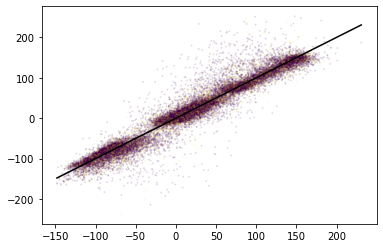

In [25]:
ridge_x_pred = ridge_pred.x.values
ridge_y_pred = ridge_pred.y.values

ridge_x_error = ridge_pred.x_error.values
ridge_y_error = ridge_pred.y_error.values

mlp_x_pred = mlp_pred.x.values
mlp_y_pred = mlp_pred.y.values

mlp_x_error = mlp_pred.x_error.values
mlp_y_error = mlp_pred.y_error.values

plt.scatter(ridge_x_pred, mlp_x_pred, label='Linear', alpha=0.1, c=ridge_pred.is_test.values, s=1)
plt.plot([ridge_x_pred.min(), ridge_x_pred.max()], [ridge_x_pred.min(), ridge_x_pred.max()], c='k')

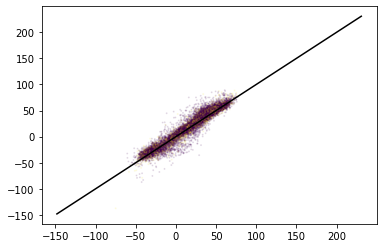

In [23]:
plt.scatter(ridge_y_pred, mlp_y_pred, label='Linear', alpha=0.1, c=ridge_pred.is_test.values, s=1)
# plt x = y over the range of the data
plt.plot([ridge_x_pred.min(), ridge_x_pred.max()], [ridge_x_pred.min(), ridge_x_pred.max()], c='k')

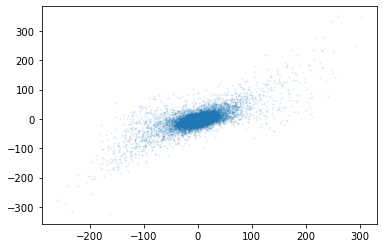

In [28]:
plt.scatter(ridge_x_error, mlp_x_error, alpha=0.1, s=1)

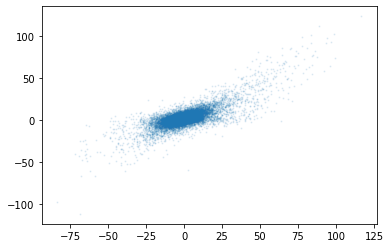

In [29]:
plt.scatter(ridge_y_error, mlp_y_error, alpha=0.1, s=1)

In [21]:
from scipy.stats import pearsonr, spearmanr
print(pearsonr(ridge_x_pred, mlp_x_pred))
print(pearsonr(ridge_y_pred, mlp_y_pred))

PearsonRResult(statistic=0.9737635831778493, pvalue=0.0)
PearsonRResult(statistic=0.978682671800064, pvalue=0.0)


In [22]:
print(spearmanr(ridge_x_pred, mlp_x_pred))
print(spearmanr(ridge_y_pred, mlp_y_pred))

SignificanceResult(statistic=0.9712215674457408, pvalue=0.0)
SignificanceResult(statistic=0.9681064753738243, pvalue=0.0)


In [30]:
print(pearsonr(ridge_x_error, mlp_x_error))
print(pearsonr(ridge_y_error, mlp_y_error))

print(spearmanr(ridge_x_error, mlp_x_error))
print(spearmanr(ridge_y_error, mlp_y_error))

PearsonRResult(statistic=0.700473206704638, pvalue=0.0)
PearsonRResult(statistic=0.7467923973150449, pvalue=0.0)
SignificanceResult(statistic=0.4579435664797488, pvalue=0.0)
SignificanceResult(statistic=0.5521027688286214, pvalue=0.0)


In [38]:
pd.Series(results[('Llama-2-7b-hf', 'World Map')][20]['ridge_scores']).unstack().T.round(3)

,test,train
haversine_mae,1586.851,1430.904
haversine_mse,7844816.901,6168303.824
haversine_r2,0.889,0.913
haversine_rmse,2800.860,2483.607
mae,9.345,8.358
mse,407.277,296.082
prox_error,0.083,0.074
r2,0.885,0.916
rmse,20.181,17.207
x_kendall,0.811,0.835


In [39]:
pd.Series(results[('Llama-2-7b-hf', 'World Map')][20]['mlp_scores']).unstack().T.round(3)

,test,train
haversine_mae,1357.840,987.056
haversine_mse,6500415.187,2851959.315
haversine_r2,0.908,0.960
haversine_rmse,2549.591,1688.775
mae,8.248,5.896
mse,360.306,141.631
prox_error,0.069,0.049
r2,0.894,0.957
rmse,18.982,11.901
x_kendall,0.845,0.891


In [31]:
np.logspace(3, 4.5, 12)

array([ 1000.        ,  1368.87450954,  1873.81742286,  2565.02090568,
        3511.19173422,  4806.38086306,  6579.33224658,  9006.28020211,
       12328.46739442, 16876.12475788, 23101.29700083, 31622.77660168])